In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Columns
### id
- Number that identifies the transaction.
- May be related to the selling date.
- May be related to the location.
- No apparent statistical relevance.

### date
- Transaction date.
- Need to be transformed in a date format.

### price
- The value of the transaction.
- Target of the regression.

### bedrooms and bathrooms
- Probably important features.
- Discrete values.

### sqft_*
- Help to understand the house shape.

### view
- Ordinal feature from 0-4.

### condition
- Ordinal feature from 1-5.

### waterfront
- binary

### grade
- Orndinal 1-13.

### yr_*
- The year from building or refurbishing.

### zipcode, lat, long
- Information of locations


## Fixing Date Column

In [6]:
data['date'] = data['date'].apply(lambda x: pd.Timestamp(year=int(x[:4]), month=int(x[4:6]), day=int(x[6:8])))

In [7]:
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

## Scatter plot for every relevant feature

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
data.iloc[:,:10].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000


In [10]:
data.iloc[:,10:].describe()

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
data[data['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [13]:
data[data['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


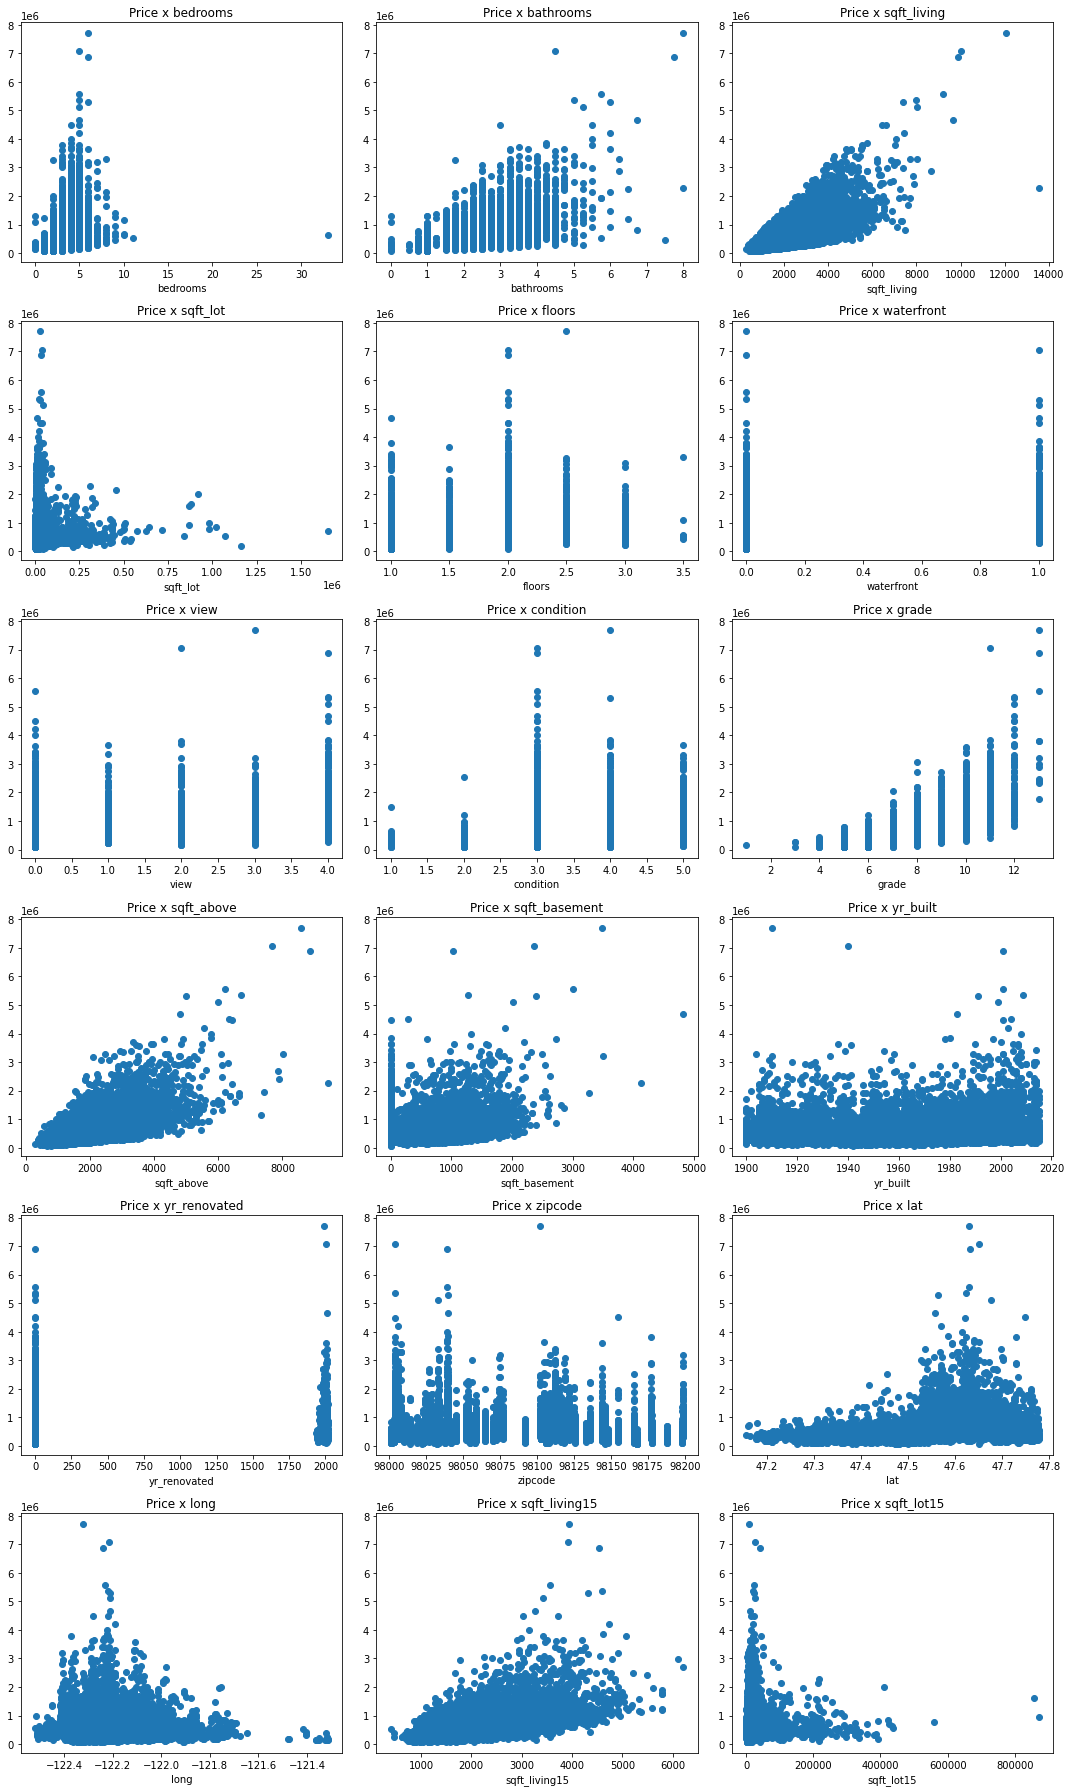

In [14]:
cols = data.columns.tolist()[3:]
fig, axes = plt.subplots(nrows=6, ncols=3, figsize = (15,25))

counter = 0
for ax in axes.flatten():
    plt.sca(ax)
    ax.scatter(data[cols[counter]],data['price'])
    plt.title(f'Price x {cols[counter]}')
    plt.xlabel(cols[counter])
    counter +=1
plt.tight_layout()

### Dealing with outliners
- House with 33 bedrooms: can be a typo from "3" or just wrong data, as it is only one outlier it will be removed.
- Houses with no bedrooms: if it has more than 1000 sqft its not likely, so it will be removed, if it has less than 1000 it may be an arrangement issue, and as it is only few data it won't be a problem.
- Houses with no bathrooms: same strategy as for no bedrooms

In [15]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [16]:
data.loc[data['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [17]:
data.loc[data['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [18]:
data.drop(data.loc[data['bedrooms'] == 33].index, axis=0, inplace=True)
data.drop(data.loc[((data['bedrooms'] == 0) | (data['bathrooms'] == 0)) & (data['sqft_living'] > 1000)].index, axis=0, inplace=True)
data.reset_index(drop=True,inplace=True)

### Year renovated is too discontinuous
- Idea: years since last renovation

In [19]:
data['yr_slr'] = 0
max_yr = max([data['yr_built'].max(),data['yr_renovated'].max()])
for index, row in data.iterrows():
    if data.loc[index,'yr_renovated'] == 0:
        data.loc[index, 'yr_slr'] = max_yr - row['yr_built']
    else:
        data.loc[index, 'yr_slr'] = max_yr - row['yr_renovated']

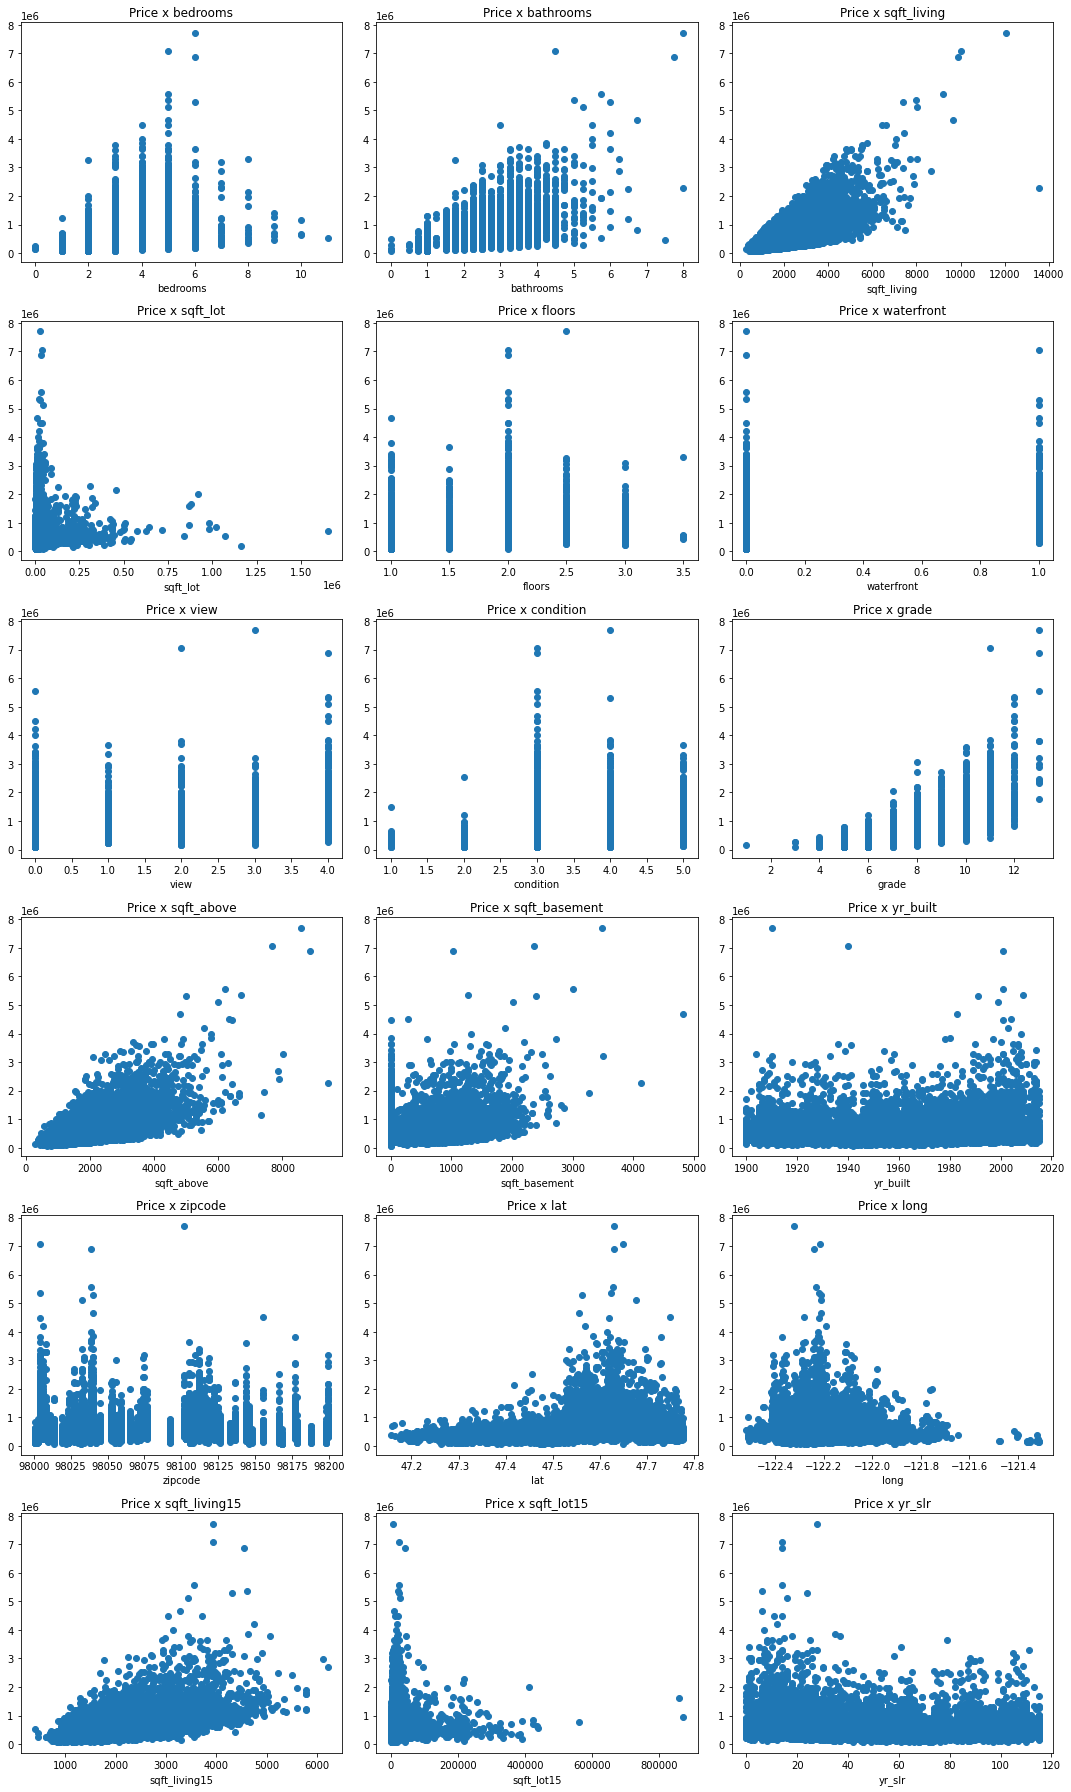

In [20]:
cols = data.columns.tolist()[3:]
cols.remove('yr_renovated')
fig, axes = plt.subplots(nrows=6, ncols=3, figsize = (15,25))

counter = 0
for ax in axes.flatten():
    plt.sca(ax)
    ax.scatter(data[cols[counter]],data['price'])
    plt.title(f'Price x {cols[counter]}')
    plt.xlabel(cols[counter])
    counter +=1
plt.tight_layout()

### Conclusions
- Some data seems to have linear relation with price.
- Other seem kind of ramdom

## Insight
Intuitively the most important things in a housing pricing should be place, size and condition. Therefore, giving a rank related to location prices might make the visualization better. So new features relating price/sqrft ranked per location will be created.

As it can be achieved both by relating zipcode or lat/long both it will be tried to use both.

In [21]:
data['price-sqft'] = data['price'].div(data['sqft_living'])

In [22]:
data['lat-cut'] = pd.qcut(data['lat'],q = 20,labels=[*range(0,20)])

In [23]:
data['long-cut'] = pd.qcut(data['long'],q = 20,labels=[*range(0,20)])

In [24]:
location_scores = []
for i in data['lat-cut'].unique():
    for j in data['long-cut'].unique():
        median = data.loc[data['lat-cut']==i].loc[data['long-cut']==j]['price-sqft'].median()
        location_scores.append({'lat':i, 'long':j,'score':median})

In [25]:
location_scores_df = pd.DataFrame(location_scores)

In [26]:
location_scores_df.sort_values(by='score',ascending=False, inplace = True)
location_scores_df.reset_index(drop = True, inplace=True)

In [27]:
max_score = location_scores_df.nunique()['score']
data['loc_price_sqft_median'] = 0
data['dumb_price'] = 0
for index, row in location_scores_df.iterrows():
    data.loc[(data['lat-cut']==row['lat']) & (data['long-cut']==row['long']), 'dumb_price'] = row['score'] * data.loc[(data['lat-cut']==row['lat']) & (data['long-cut']==row['long']), 'sqft_lot']
    data.loc[(data['lat-cut']==row['lat']) & (data['long-cut']==row['long']), 'loc_price_sqft_median'] = row['score']

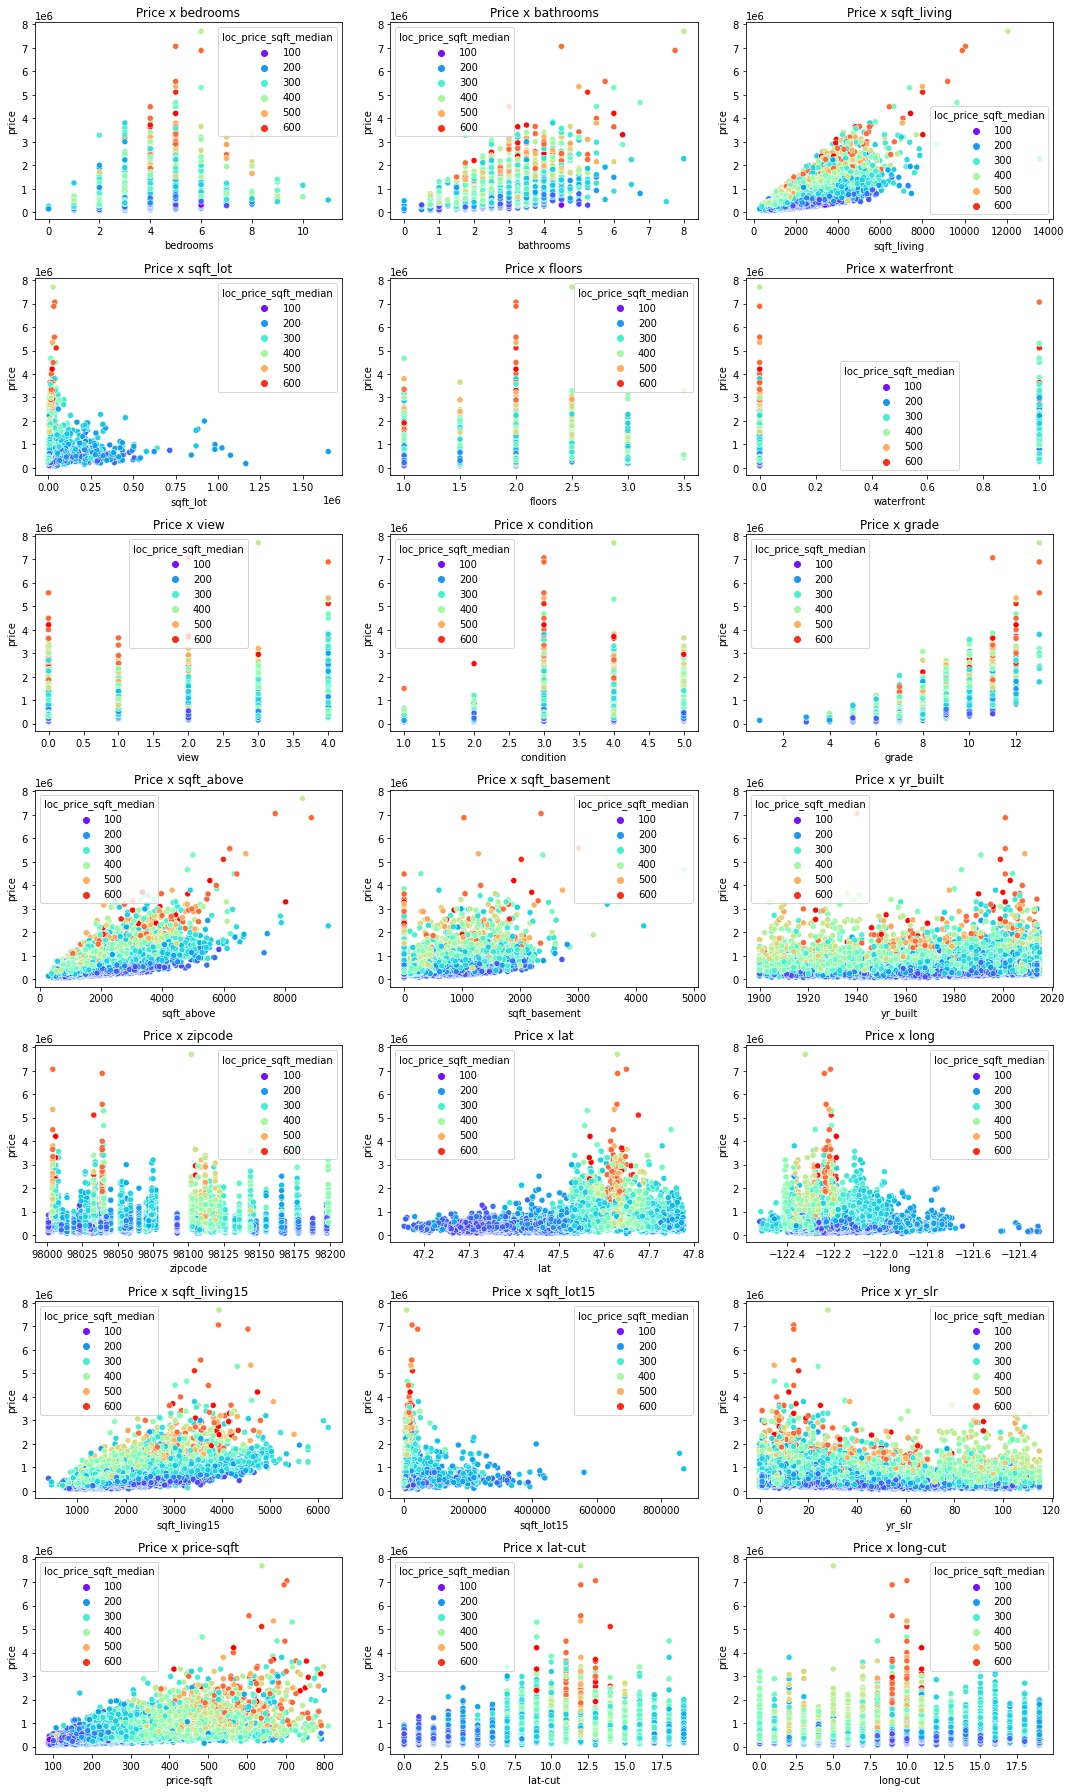

In [28]:
cols = data.columns.tolist()[3:]
cols.remove('yr_renovated')
fig, axes = plt.subplots(nrows=7, ncols=3, figsize = (15,25))

counter = 0
for ax in axes.flatten():
    plt.sca(ax)
    sns.scatterplot(y=data.loc[:,'price'], x=data.loc[:,cols[counter]], hue=data['loc_price_sqft_median'], palette='rainbow')
    plt.title(f'Price x {cols[counter]}')
    counter +=1
plt.tight_layout()

# Selecting important features

### Personal decision

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21603 entries, 0 to 21602
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21603 non-null  int64         
 1   date                   21603 non-null  datetime64[ns]
 2   price                  21603 non-null  float64       
 3   bedrooms               21603 non-null  int64         
 4   bathrooms              21603 non-null  float64       
 5   sqft_living            21603 non-null  int64         
 6   sqft_lot               21603 non-null  int64         
 7   floors                 21603 non-null  float64       
 8   waterfront             21603 non-null  int64         
 9   view                   21603 non-null  int64         
 10  condition              21603 non-null  int64         
 11  grade                  21603 non-null  int64         
 12  sqft_above             21603 non-null  int64         
 13  s

In [30]:
drop_list = ['id','date','zipcode','yr_built','lat-cut','long-cut','long','lat']
data_1 = data.drop(drop_list,axis=1)

<AxesSubplot:>

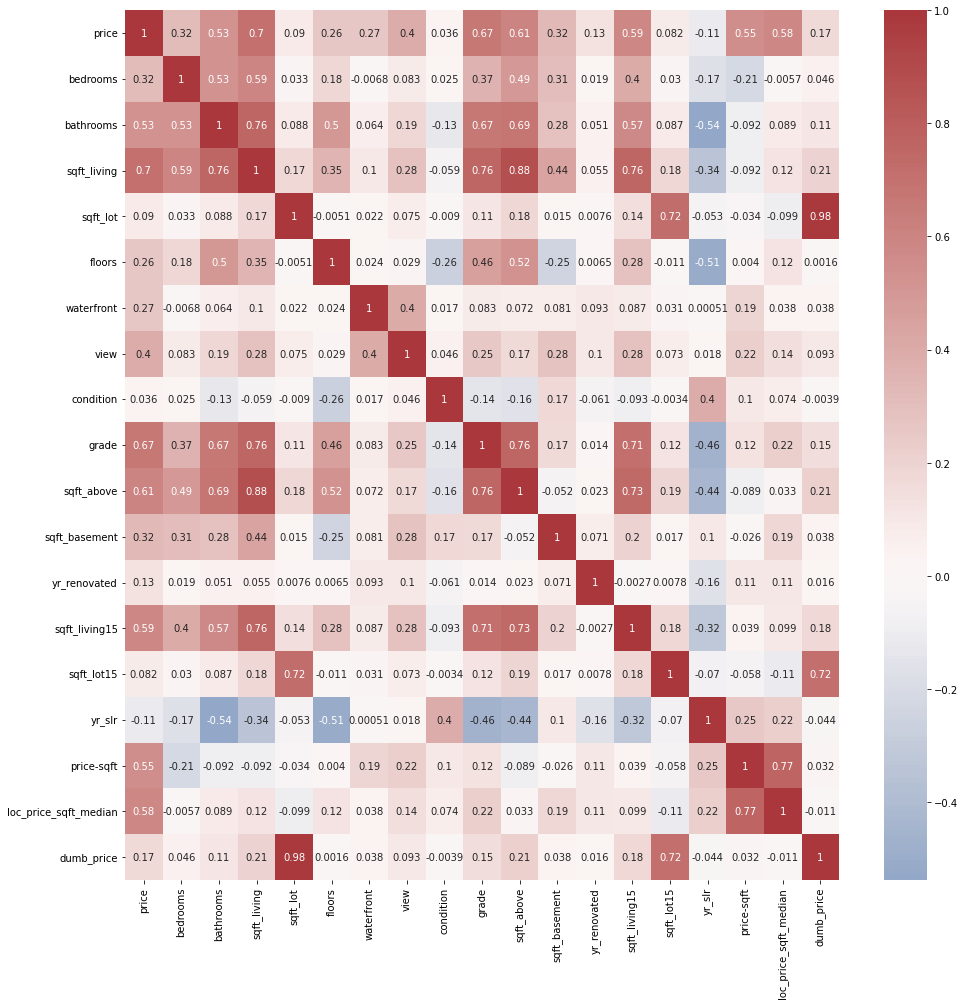

In [31]:
figure = plt.figure(figsize=(16,16))
sns.heatmap(data_1.corr(), annot=True, cmap = "vlag", center=0)

In [32]:
data_1.corr().loc['price']

price                    1.000000
bedrooms                 0.316276
bathrooms                0.525986
sqft_living              0.701964
sqft_lot                 0.089624
floors                   0.257012
waterfront               0.266426
view                     0.397347
condition                0.036322
grade                    0.667464
sqft_above               0.605500
sqft_basement            0.323886
yr_renovated             0.126457
sqft_living15            0.585314
sqft_lot15               0.082362
yr_slr                  -0.105879
price-sqft               0.554675
loc_price_sqft_median    0.580346
dumb_price               0.167968
Name: price, dtype: float64

## Removing very low correlated features
yr_built

In [33]:
drop_list.append('yr_built')
data_1 = data.drop(drop_list,axis=1)

# Linear Regression Techniques

- Linear regression, can't handle multicollinearities
- Ridge regression, can be used, but might leave some unused features
- Lasso, helps to find non-important features, but might not be effective
- Elastic Net, combines Ridge and Lasso

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
data_2 = data_1.drop(['price'], axis = 1)

In [36]:
target = data_1.loc[:,'price']

In [37]:
n1 = MinMaxScaler()
n2 = MinMaxScaler()

In [38]:
target.values.reshape(1, -1)

array([[221900., 538000., 180000., ..., 402101., 400000., 325000.]])

In [39]:
norm_target = n2.fit_transform(target.values.reshape(-1, 1))

In [40]:
norm_data = n1.fit_transform(data_2)

### Ridge

In [41]:
from sklearn.linear_model import RidgeCV

In [42]:
ridge = RidgeCV()
ridge.fit(norm_data, norm_target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [43]:
ridge.coef_

array([[-0.00179488,  0.0153044 ,  0.18482904, -0.3565146 , -0.00909243,
         0.0368725 ,  0.0087151 ,  0.00581421,  0.02984808,  0.21510146,
         0.10109116,  0.00327654, -0.01739859, -0.02825059, -0.00052884,
         0.17305543,  0.0133699 ,  0.3448068 ]])

In [44]:
pred = ridge.predict(norm_data)

In [45]:
pred = n2.inverse_transform(pred)

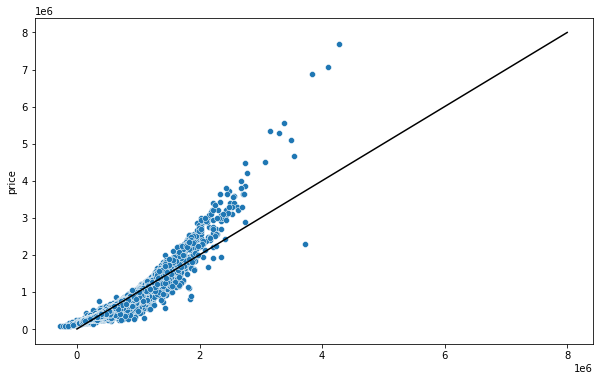

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [47]:
ridge.score(norm_data, norm_target)

0.8911320228395144

### Lasso

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
lasso = LassoCV()

In [50]:
norm_target[:,0]

array([0.01926557, 0.06072131, 0.01377049, ..., 0.04289849, 0.04262295,
       0.03278689])

In [51]:
lasso.fit(norm_data, norm_target[:,0])

LassoCV()

In [52]:
lasso.coef_

array([-1.30549772e-04,  1.44762088e-02,  4.60838079e-01, -3.42903024e-02,
       -9.59308612e-03,  3.77220751e-02,  8.47460872e-03,  5.64010375e-03,
        2.88525708e-02,  2.53245304e-02,  0.00000000e+00,  3.06944589e-03,
       -1.46917913e-02, -1.90971652e-02, -7.82701327e-04,  1.72925452e-01,
        1.84024166e-02,  2.37312959e-02])

Zero coefficients = bedroom, sqft_basement, yr_slr

In [53]:
pred = lasso.predict(norm_data)

In [54]:
pred.reshape(-1,1)

array([[ 0.00601952],
       [ 0.06508187],
       [-0.00296354],
       ...,
       [ 0.05168989],
       [ 0.04069651],
       [ 0.03360605]])

In [55]:
pred = n2.inverse_transform(pred.reshape(-1,1))

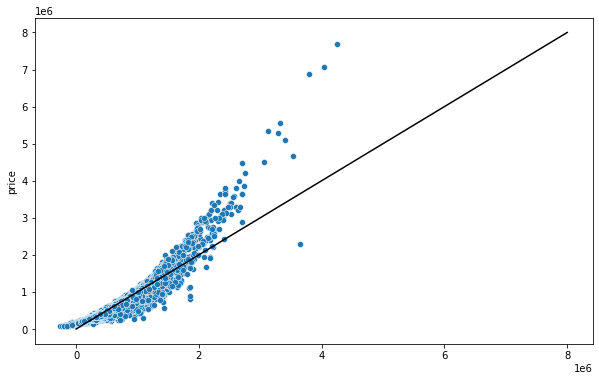

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [57]:
lasso.score(norm_data, norm_target)

0.8894772003499122

### Elastic-Net

In [150]:
from sklearn.linear_model import ElasticNetCV

In [151]:
en = ElasticNetCV(l1_ratio=[0.1,0.3,0.5,0.7,0.9])

In [152]:
en.fit(norm_data, norm_target.ravel())

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9])

In [153]:
en.coef_

array([-9.95241340e-05,  1.45475649e-02,  4.60384894e-01, -3.27715342e-02,
       -9.61778037e-03,  3.77393178e-02,  8.48746157e-03,  5.64569041e-03,
        2.88934671e-02,  2.55209458e-02,  0.00000000e+00,  3.07380926e-03,
       -1.46516176e-02, -1.90785069e-02, -7.76098883e-04,  1.72868463e-01,
        1.84740794e-02,  2.22728695e-02])

In [154]:
pred = en.predict(norm_data)

In [155]:
pred = n2.inverse_transform(pred.reshape(-1,1))

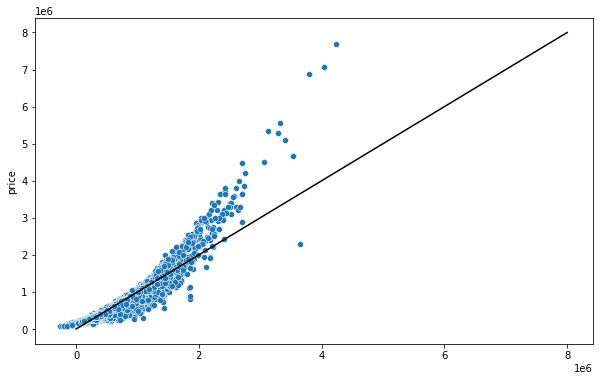

In [156]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [157]:
en.score(norm_data, norm_target)

0.8894655967876882

### Including Polynomial features

Ridge will not be performed as there is lots of features to drop

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [68]:
poly_data = pf.fit_transform(data_2)

In [142]:
pf.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x3 x16',
 'x3 x17',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x4 x16',
 'x4 x17',
 'x5^2',
 'x5 x6',
 'x5 x7',
 '

In [145]:
features_names = {'x' + str(i):data_2.columns[i] for i in range(0,18)}

In [146]:
features_names

{'x0': 'bedrooms',
 'x1': 'bathrooms',
 'x2': 'sqft_living',
 'x3': 'sqft_lot',
 'x4': 'floors',
 'x5': 'waterfront',
 'x6': 'view',
 'x7': 'condition',
 'x8': 'grade',
 'x9': 'sqft_above',
 'x10': 'sqft_basement',
 'x11': 'yr_renovated',
 'x12': 'sqft_living15',
 'x13': 'sqft_lot15',
 'x14': 'yr_slr',
 'x15': 'price-sqft',
 'x16': 'loc_price_sqft_median',
 'x17': 'dumb_price'}

In [69]:
norm_poly_data = n1.fit_transform(poly_data)

In [70]:
norm_target = n2.fit_transform(target.values.reshape(-1, 1))

### Ridge

In [71]:
from sklearn.linear_model import RidgeCV

In [72]:
ridge = RidgeCV()
ridge.fit(norm_poly_data, norm_target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [73]:
ridge.coef_

array([[-3.55773480e-03, -9.32067433e-04, -4.58518640e-03,
        -6.82761828e-05, -5.17314689e-04,  1.02924085e-04,
         1.74815017e-03, -3.41265968e-04, -1.16941067e-03,
        -5.01793123e-03, -3.10999730e-03,  4.23279811e-04,
         3.03927834e-03, -9.85063947e-04, -2.10537355e-05,
        -1.79082999e-02,  1.09860916e-02, -7.95830471e-04,
         2.98316373e-03,  4.18770427e-03, -5.94587001e-03,
        -1.85841636e-04,  1.66994927e-03, -1.20685527e-03,
        -5.06653774e-04, -7.10355806e-04,  2.85911987e-03,
        -8.54549699e-03, -2.27489813e-05, -7.54251646e-04,
         1.97507727e-03,  2.81807391e-03,  9.68556426e-05,
         8.29145282e-03, -6.98467666e-03, -6.12112755e-04,
        -5.43637351e-04,  5.77117391e-03,  8.08167199e-04,
         1.92120394e-03, -6.25158428e-03, -2.42858939e-03,
        -9.77604051e-04, -4.35192572e-03,  4.99332632e-03,
         7.54346103e-03, -1.03110775e-03, -4.54131939e-03,
        -6.55984025e-04, -5.20066434e-04,  3.36925780e-0

In [74]:
pred = ridge.predict(norm_poly_data)

In [75]:
pred = n2.inverse_transform(pred)

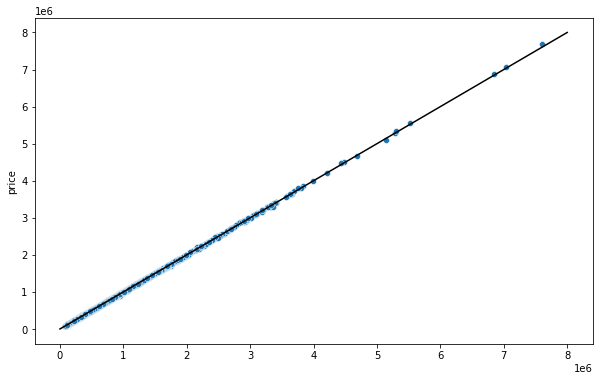

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [77]:
ridge.score(norm_poly_data, norm_target)

0.9999270737531971

### Lasso

In [99]:
from sklearn.linear_model import LassoCV

In [101]:
norm_target[:,0]

array([0.01926557, 0.06072131, 0.01377049, ..., 0.04289849, 0.04262295,
       0.03278689])

In [114]:
lasso.fit(norm_poly_data, norm_target[:,0])

LassoCV()

In [138]:
lasso.coef_

array([ 0.00000000e+00,  8.27947577e-05,  6.28214481e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15511655e-04,  0.00000000e+00,
        0.00000000e+00,  3.36872248e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.30479488e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [141]:
np.array(pf.get_feature_names())[lasso.coef_ != 0]

array(['x1', 'x2', 'x6', 'x9', 'x0 x15', 'x2 x15', 'x2 x16', 'x7 x10',
       'x8 x9', 'x8 x15', 'x9 x15', 'x10 x16', 'x12 x15'], dtype='<U7')

In [167]:
translated_features_lasso = []
for i in np.array(pf.get_feature_names())[lasso.coef_ != 0]:
    features = i.split(" ")
    aux=[]
    for j in features:
        aux.append(features_names.get(j))
    translated_features_lasso.append(aux)
translated_features_lasso

[['bathrooms'],
 ['sqft_living'],
 ['view'],
 ['sqft_above'],
 ['bedrooms', 'price-sqft'],
 ['sqft_living', 'price-sqft'],
 ['sqft_living', 'loc_price_sqft_median'],
 ['condition', 'sqft_basement'],
 ['grade', 'sqft_above'],
 ['grade', 'price-sqft'],
 ['sqft_above', 'price-sqft'],
 ['sqft_basement', 'loc_price_sqft_median'],
 ['sqft_living15', 'price-sqft']]

Zero coefficients = bedroom, sqft_basement, yr_slr

In [125]:
pred = lasso.predict(norm_poly_data)

In [126]:
pred.reshape(-1,1)

array([[0.01927615],
       [0.06063333],
       [0.01388985],
       ...,
       [0.04295859],
       [0.04266046],
       [0.03283895]])

In [127]:
pred = n2.inverse_transform(pred.reshape(-1,1))

In [128]:
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21598    360000.0
21599    400000.0
21600    402101.0
21601    400000.0
21602    325000.0
Name: price, Length: 21603, dtype: float64

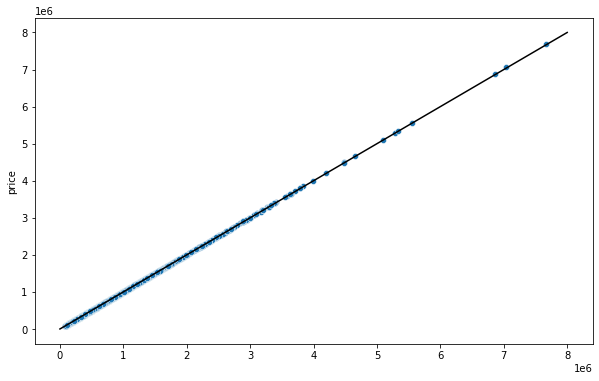

In [129]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [130]:
lasso.score(X_test, y_test)

0.9999923223976794

### Elastic-Net

In [158]:
from sklearn.linear_model import ElasticNetCV

In [159]:
en = ElasticNetCV(l1_ratio=[0.1,0.3,0.5,0.7,0.9])

In [160]:
en.fit(norm_poly_data, norm_target.ravel())

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9])

In [161]:
en.coef_

array([ 0.00000000e+00,  0.00000000e+00,  3.52479200e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.56923452e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.29577969e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [168]:
translated_features_en = []
for i in np.array(pf.get_feature_names())[lasso.coef_ != 0]:
    features = i.split(" ")
    aux=[]
    for j in features:
        aux.append(features_names.get(j))
    translated_features_en.append(aux)
translated_features_en

[['bathrooms'],
 ['sqft_living'],
 ['view'],
 ['sqft_above'],
 ['bedrooms', 'price-sqft'],
 ['sqft_living', 'price-sqft'],
 ['sqft_living', 'loc_price_sqft_median'],
 ['condition', 'sqft_basement'],
 ['grade', 'sqft_above'],
 ['grade', 'price-sqft'],
 ['sqft_above', 'price-sqft'],
 ['sqft_basement', 'loc_price_sqft_median'],
 ['sqft_living15', 'price-sqft']]

In [169]:
translated_features_en == translated_features_lasso

True

In [162]:
pred = en.predict(norm_poly_data)

In [163]:
pred = n2.inverse_transform(pred.reshape(-1,1))

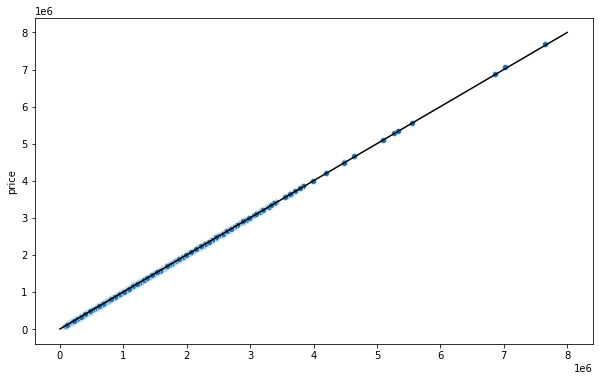

In [164]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred[:,0], y=target)
plt.plot([0,8e6],[0,8e6], color='k')

In [95]:
en.score(norm_poly_data, norm_target)

0.9999891598871202